### 데이터 수집
- 서울 열린 데이터 광장 홈페이지
   - *서울시 주민등록인구(구별) 통계
    - *서울시 자치구 년도별 CCTV 설치현황
    - *서울시 5대 범죄 발생현황 통계
    - 구별 인구 통계 : https://data.seoul.go.kr/dataList/419/S/2/datasetView.do 
    - cctv : https://data.seoul.go.kr/dataList/OA-2734/F/1/datasetView.do
    - 서울시 5대범죄 : https://data.seoul.go.kr/dataList/316/S/2/datasetView.do

In [1]:
import seaborn as sns
sns.set(font_scale=1)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn')

# 한글처리
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 경고 메세지
import warnings
warnings.simplefilter("ignore")

## 1. CCTV 설치 현황

### 데이터 로드
- 필요없는 열 제거
- , 제거

In [3]:
cctv_df = pd.read_csv("../../data/dataset/서울시CCTV설치운영현황(자치구)_년도별_211231기준.csv",
                      encoding='cp949',
                      skiprows=[0,2],
                      thousands=",")
cctv_df.head()

,구분,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,종로구,1715,815,NaN,NaN,195,150,0,261,85,9,200,0
1,중 구,2447,16,114.0,87.0,77,236,240,372,386,155,361,403
2,용산구,2611,34,71.0,234.0,125,221,298,351,125,307,617,228
3,성동구,3829,163,144.0,208.0,107,325,255,967,415,490,472,283
4,광진구,3211,35,57.0,100.0,187,98,52,675,465,712,175,655


In [4]:
cctv_df.shape

(25, 13)

In [5]:
cctv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   구분        25 non-null     object 
 1   총계        25 non-null     int64  
 2   2012년 이전  25 non-null     int64  
 3   2012년     24 non-null     float64
 4   2013년     24 non-null     float64
 5   2014년     25 non-null     int64  
 6   2015년     25 non-null     int64  
 7   2016년     25 non-null     int64  
 8   2017년     25 non-null     int64  
 9   2018년     25 non-null     int64  
 10  2019년     25 non-null     int64  
 11  2020년     25 non-null     int64  
 12  2021년     25 non-null     int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 2.7+ KB


### 데이터 전처리

#### 1) NaN처리 -0으로 채우기

In [6]:
cctv_df.fillna(0, inplace=True)

In [7]:
cctv_df.isnull().sum()

구분          0
총계          0
2012년 이전    0
2012년       0
2013년       0
2014년       0
2015년       0
2016년       0
2017년       0
2018년       0
2019년       0
2020년       0
2021년       0
dtype: int64

#### 2) 컬럼명 변경
- 구분 => 구 별
- 총계 => cctv총계

In [8]:
cctv_df.rename(columns={"구분":"구 별","총계":"cctv총계"}, inplace=True)
cctv_df.head(2)

,구 별,cctv총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,종로구,1715,815,0.0,0.0,195,150,0,261,85,9,200,0
1,중 구,2447,16,114.0,87.0,77,236,240,372,386,155,361,403


#### 3) 2019년 이전 컬럼 생성
- 2012년 이전 ~ 2019년 데이터 합

In [9]:
cctv_df['2019년 이전'] = cctv_df['2012년 이전'] + cctv_df['2012년']+ cctv_df['2013년']\
                        + cctv_df['2014년']+ cctv_df['2015년']+ cctv_df['2016년']\
                        + cctv_df['2017년']+ cctv_df['2018년']+ cctv_df['2019년']

In [10]:
cctv_df.head()

,구 별,cctv총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2019년 이전
0,종로구,1715,815,0.0,0.0,195,150,0,261,85,9,200,0,1515.0
1,중 구,2447,16,114.0,87.0,77,236,240,372,386,155,361,403,1683.0
2,용산구,2611,34,71.0,234.0,125,221,298,351,125,307,617,228,1766.0
3,성동구,3829,163,144.0,208.0,107,325,255,967,415,490,472,283,3074.0
4,광진구,3211,35,57.0,100.0,187,98,52,675,465,712,175,655,2381.0


In [11]:
# 총계 제거
cctv_df.drop(columns=['2019년 이전'], inplace=True)

In [12]:
cctv_df.head()

,구 별,cctv총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,종로구,1715,815,0.0,0.0,195,150,0,261,85,9,200,0
1,중 구,2447,16,114.0,87.0,77,236,240,372,386,155,361,403
2,용산구,2611,34,71.0,234.0,125,221,298,351,125,307,617,228
3,성동구,3829,163,144.0,208.0,107,325,255,967,415,490,472,283
4,광진구,3211,35,57.0,100.0,187,98,52,675,465,712,175,655


In [13]:
# 컬럼을 제외
cctv_df.columns.difference(['구 별','cctv총계'])

Index(['2012년', '2012년 이전', '2013년', '2014년', '2015년', '2016년', '2017년',
       '2018년', '2019년', '2020년', '2021년'],
      dtype='object')

- 같은 결과 값
    - cctv_df[cctv_df.columns.difference(['구 별','cctv총계','2020년','2021년'])]

    - cctv_df[['2012'년','2012'년 이전','2013'년','2014'년','2015'년','2016'년','2017'년','2018'년','2019'년']]

In [14]:
cctv_df[cctv_df.columns.difference(['구 별','cctv총계','2020년','2021년'])]

,2012년,2012년 이전,2013년,2014년,2015년,2016년,2017년,2018년,2019년
0,0.0,815,0.0,195,150,0,261,85,9
1,114.0,16,87.0,77,236,240,372,386,155
2,71.0,34,234.0,125,221,298,351,125,307
3,144.0,163,208.0,107,325,255,967,415,490
4,57.0,35,100.0,187,98,52,675,465,712
5,0.0,4,14.0,16,115,804,814,201,218
6,21.0,346,253.0,72,132,155,153,174,1049
7,78.0,81,170.0,229,322,594,890,867,714
8,0.0,8,22.0,61,124,251,29,391,1078
9,22.0,128,2.0,145,172,123,129,222,210


In [15]:
cctv_df['2019년 이전'] = cctv_df[cctv_df.columns.difference(['구 별','cctv총계','2020년','2021년'])].sum(axis=1)

In [16]:
cctv_df.head(3)

,구 별,cctv총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2019년 이전
0,종로구,1715,815,0.0,0.0,195,150,0,261,85,9,200,0,1515.0
1,중 구,2447,16,114.0,87.0,77,236,240,372,386,155,361,403,1683.0
2,용산구,2611,34,71.0,234.0,125,221,298,351,125,307,617,228,1766.0


#### 4) 2019년 이전 컬럼 삭제

In [17]:
cctv_df.drop(columns=['2012년', '2012년 이전', '2013년', '2014년', '2015년', '2016년', '2017년','2018년', '2019년'], inplace=True)

In [18]:
# cctv_df.drop(columns=cctv_df[cctv_df.columns.difference(['구 별','cctv총계','2020년','2021년','2019년 이전'])], inplace=True)

In [19]:
cctv_df.head()

,구 별,cctv총계,2020년,2021년,2019년 이전
0,종로구,1715,200,0,1515.0
1,중 구,2447,361,403,1683.0
2,용산구,2611,617,228,1766.0
3,성동구,3829,472,283,3074.0
4,광진구,3211,175,655,2381.0


### EDA

#### 1) 구별 cctv가 가장 적게 설치되어 있는 구 알아보기

In [20]:
#값 확인
min(cctv_df['cctv총계']) == cctv_df['cctv총계']

0      True
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
Name: cctv총계, dtype: bool

In [21]:
cctv_df[min(cctv_df['cctv총계']) == cctv_df['cctv총계']]

,구 별,cctv총계,2020년,2021년,2019년 이전
0,종로구,1715,200,0,1515.0


In [22]:
cctv_df.sort_values('cctv총계').head(1)

,구 별,cctv총계,2020년,2021년,2019년 이전
0,종로구,1715,200,0,1515.0


#### 2) 구별 cctv가 가장 많이 설치되어 있는 구 알아보기

In [23]:
# 값 확인
max(cctv_df['cctv총계']) == cctv_df['cctv총계']

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22     True
23    False
24    False
Name: cctv총계, dtype: bool

In [24]:
cctv_df[max(cctv_df['cctv총계']) == cctv_df['cctv총계']]

,구 별,cctv총계,2020년,2021년,2019년 이전
22,강남구,6871,926,516,5429.0


In [25]:
cctv_df.sort_values('cctv총계').tail(1)

,구 별,cctv총계,2020년,2021년,2019년 이전
22,강남구,6871,926,516,5429.0


In [26]:
cctv_df.sort_values('cctv총계', ascending=False).head(1)

,구 별,cctv총계,2020년,2021년,2019년 이전
22,강남구,6871,926,516,5429.0


## 2. 서울시 거주 인구 데이터

### 데이터로드
- 0,1,3 행 제외

In [27]:
seoul_df = pd.read_excel("../../data/dataset/서울시구별인구통계.xls",
                         skiprows=[0,1,3],
                         usecols='B,D,G,J,N')
seoul_df.head()

,자치구,계,계.1,계.2,65세이상고령자
0,종로구,153684,144275,9409,28064
1,중구,131450,122173,9277,24742
2,용산구,236518,222169,14349,39461
3,성동구,291609,285073,6536,46896
4,광진구,353110,340707,12403,52604


### 데이터 전처리

#### 1) 컬럼명 변경
- '구 별', '총 인구','한국인','외국인','고령자' 

In [28]:
seoul_df.columns=['구 별', '총 인구','한국인','외국인', '고령자']           

In [29]:
seoul_df.head()

,구 별,총 인구,한국인,외국인,고령자
0,종로구,153684,144275,9409,28064
1,중구,131450,122173,9277,24742
2,용산구,236518,222169,14349,39461
3,성동구,291609,285073,6536,46896
4,광진구,353110,340707,12403,52604


In [30]:
seoul_df.index

RangeIndex(start=0, stop=25, step=1)

### EDA

#### 1) 어느 구에 외국인이 가장 많은가?

In [31]:
seoul_df.sort_values('외국인').tail(1)

,구 별,총 인구,한국인,외국인,고령자
16,구로구,419984,396017,23967,73864


In [32]:
seoul_df.sort_values('외국인', ascending=False).head(5)

,구 별,총 인구,한국인,외국인,고령자
16,구로구,419984,396017,23967,73864
18,영등포구,400241,376740,23501,63547
5,동대문구,352592,337982,14610,62963
2,용산구,236518,222169,14349,39461
20,관악구,500336,486375,13961,80686


#### 2) 어느 구에 고령자 수가 가장 많은가?

In [33]:
seoul_df.sort_values('고령자').tail(1)

,구 별,총 인구,한국인,외국인,고령자
23,송파구,668261,662607,5654,99854


In [34]:
seoul_df.sort_values('고령자', ascending=False).head(5)

,구 별,총 인구,한국인,외국인,고령자
23,송파구,668261,662607,5654,99854
15,강서구,578426,573046,5380,93924
10,노원구,514445,510486,3959,89426
11,은평구,476013,472259,3754,88418
20,관악구,500336,486375,13961,80686


#### 3) cctv 설치 대수 대비 범죄율 파악
***서울시 구별 인구 + cctv merge***

In [35]:
# 중구 값이 달라서 빠짐
# 중구 != 중 구
pd.merge(seoul_df,cctv_df,on='구 별')

,구 별,총 인구,한국인,외국인,고령자,cctv총계,2020년,2021년,2019년 이전
0,종로구,153684,144275,9409,28064,1715,200,0,1515.0
1,용산구,236518,222169,14349,39461,2611,617,228,1766.0
2,성동구,291609,285073,6536,46896,3829,472,283,3074.0
3,광진구,353110,340707,12403,52604,3211,175,655,2381.0
4,동대문구,352592,337982,14610,62963,2628,223,219,2186.0
5,중랑구,393600,389043,4557,72851,3737,934,448,2355.0
6,성북구,442680,433150,9530,75719,4602,253,404,3945.0
7,강북구,300824,297384,3440,64961,3090,656,470,1964.0
8,도봉구,318100,316098,2002,65122,1930,184,593,1153.0
9,노원구,514445,510486,3959,89426,2492,387,221,1884.0


In [36]:
# 이름값 변경
cctv_df.iloc[1,0]='중구'
cctv_df.head(2)

,구 별,cctv총계,2020년,2021년,2019년 이전
0,종로구,1715,200,0,1515.0
1,중구,2447,361,403,1683.0


In [37]:
merge_df = pd.merge(seoul_df,cctv_df,on='구 별')
merge_df

,구 별,총 인구,한국인,외국인,고령자,cctv총계,2020년,2021년,2019년 이전
0,종로구,153684,144275,9409,28064,1715,200,0,1515.0
1,중구,131450,122173,9277,24742,2447,361,403,1683.0
2,용산구,236518,222169,14349,39461,2611,617,228,1766.0
3,성동구,291609,285073,6536,46896,3829,472,283,3074.0
4,광진구,353110,340707,12403,52604,3211,175,655,2381.0
5,동대문구,352592,337982,14610,62963,2628,223,219,2186.0
6,중랑구,393600,389043,4557,72851,3737,934,448,2355.0
7,성북구,442680,433150,9530,75719,4602,253,404,3945.0
8,강북구,300824,297384,3440,64961,3090,656,470,1964.0
9,도봉구,318100,316098,2002,65122,1930,184,593,1153.0


***구 별 컬럼을 인덱스 설정***

In [38]:
merge_df.set_index('구 별', inplace=True)
merge_df

,총 인구,한국인,외국인,고령자,cctv총계,2020년,2021년,2019년 이전
구 별,,,,,,,,
종로구,153684,144275,9409,28064,1715,200,0,1515.0
중구,131450,122173,9277,24742,2447,361,403,1683.0
용산구,236518,222169,14349,39461,2611,617,228,1766.0
성동구,291609,285073,6536,46896,3829,472,283,3074.0
광진구,353110,340707,12403,52604,3211,175,655,2381.0
동대문구,352592,337982,14610,62963,2628,223,219,2186.0
중랑구,393600,389043,4557,72851,3737,934,448,2355.0
성북구,442680,433150,9530,75719,4602,253,404,3945.0
강북구,300824,297384,3440,64961,3090,656,470,1964.0


***1인당 cctv 비율 컬럼을 생성***
- cctv총계 / 총인구

In [39]:
merge_df['1인당 cctv 비율'] = merge_df['cctv총계'] / merge_df['총 인구'] *100

In [40]:
merge_df.head()

,총 인구,한국인,외국인,고령자,cctv총계,2020년,2021년,2019년 이전,1인당 cctv 비율
구 별,,,,,,,,,
종로구,153684,144275,9409,28064,1715,200,0,1515.0,1.115926
중구,131450,122173,9277,24742,2447,361,403,1683.0,1.861544
용산구,236518,222169,14349,39461,2611,617,228,1766.0,1.103933
성동구,291609,285073,6536,46896,3829,472,283,3074.0,1.313060
광진구,353110,340707,12403,52604,3211,175,655,2381.0,0.909348


***상관계수 : corr***
- 변수간의 관계의 정도와 방향을 수치로 요약해 주는 지표
- 상관계수는 -1 ~ 1 사이의 값으로 나타남
- 0에 가까울수록 상관 관계는 낮아지며, -1이나 +1에 가까울수록 상관관계는 높아짐
- 증감의 방향이 + 인 경우에는 정적인 상관관계, -인 경우에는 부정적인 상관과계가 있다고 봄

**총 인구와 cctv총계 상관관계**

In [41]:
# corr : 
merge_df['총 인구'].corr(merge_df['cctv총계'],method='spearman')

0.48461538461538467

**외국인과 cctv총계 상관관계**

In [42]:
merge_df['외국인'].corr(merge_df['cctv총계'],method='spearman')

0.05615384615384616

### 시각화
- 1인당 cctv 비율 bar차트

matplotlib

<BarContainer object of 25 artists>

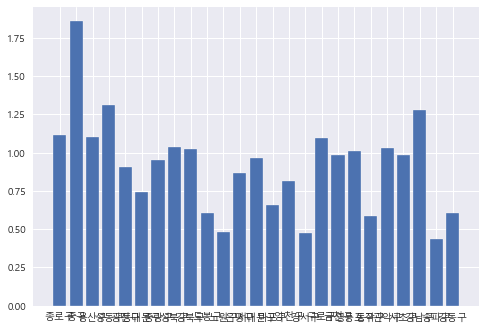

In [43]:
plt.bar(merge_df.index, merge_df['1인당 cctv 비율'])

Text(0.5, 1.0, '구 별 1인당 cctv 비율')

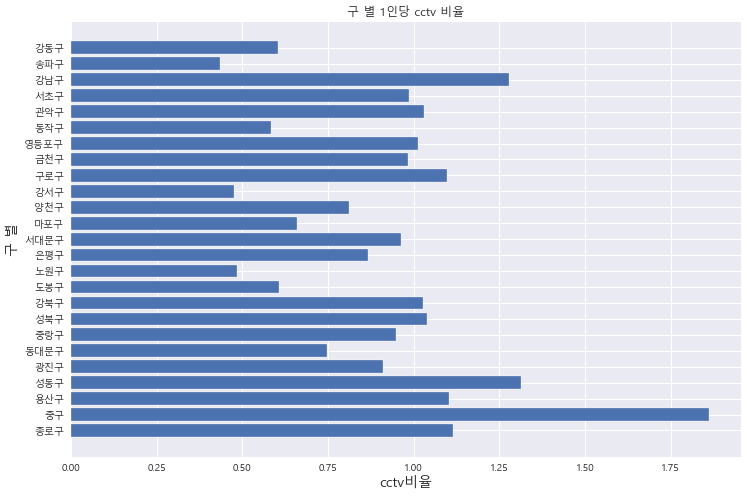

In [44]:
plt.figure(figsize=(12,8))

plt.barh(merge_df.index, merge_df['1인당 cctv 비율'])
plt.xlabel('cctv비율', fontsize=14)
plt.ylabel('구 별', fontsize=14)
plt.title('구 별 1인당 cctv 비율')

pandas

<AxesSubplot:xlabel='구 별'>

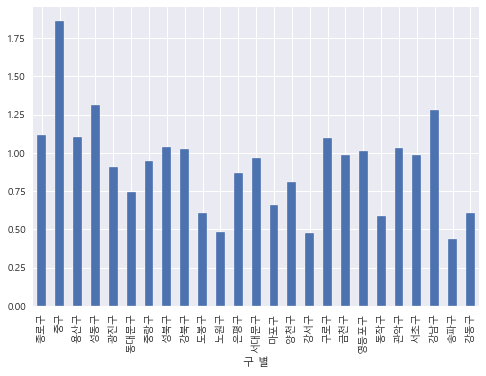

In [45]:
merge_df['1인당 cctv 비율'].plot.bar()

Text(0.5, 1.0, '구 별 1인당 cctv 비율')

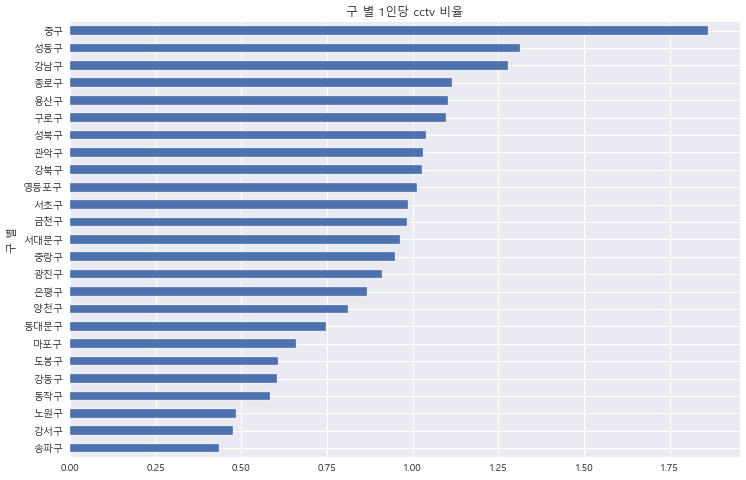

In [46]:
merge_df['1인당 cctv 비율'].sort_values().plot.barh(figsize=(12,8))
plt.title('구 별 1인당 cctv 비율')

seaborn

<AxesSubplot:xlabel='구 별', ylabel='1인당 cctv 비율'>

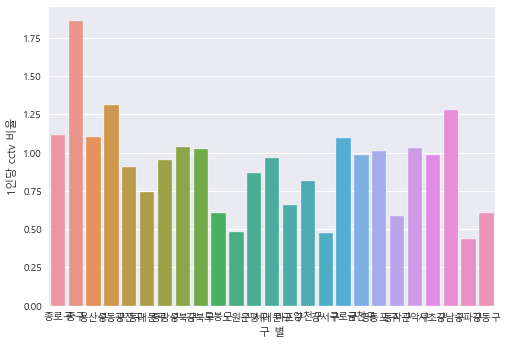

In [47]:
sns.barplot(data=merge_df, y='1인당 cctv 비율', x=merge_df.index)

<AxesSubplot:xlabel='1인당 cctv 비율', ylabel='구 별'>

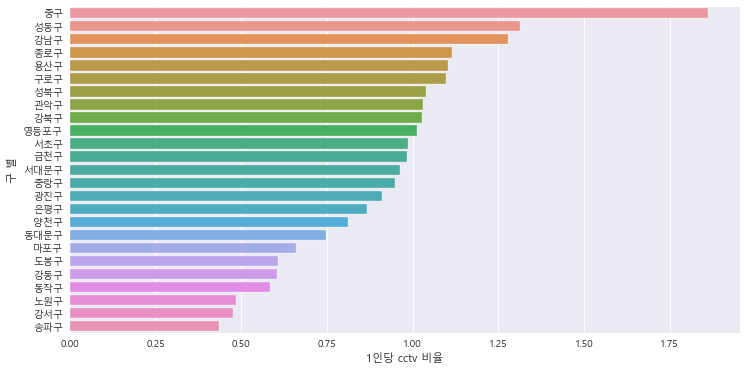

In [48]:
plt.figure(figsize=(12,6))
sns.barplot(data=merge_df, x='1인당 cctv 비율', y=merge_df.index,
            order = merge_df['1인당 cctv 비율'].sort_values(ascending=False).index)

## 3. 범죄율

### 데이터 로드

In [49]:
crime_df= pd.read_excel("../../data/dataset/서울시5대범죄.xls", usecols='B:D', skiprows=[0,2])
crime_df.head(3)

,자치구,발생,검거
0,종로구,3102,3343
1,중구,3411,2323
2,용산구,2969,2056


### 데이터 전처리

In [50]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   자치구     25 non-null     object
 1   발생      25 non-null     int64 
 2   검거      25 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 728.0+ bytes


#### 1) 컬럼명 변경
- '구 별', '범죄건', '검거건'

In [51]:
crime_df.columns=['구 별', '범죄건', '검거건']
crime_df.head(3)

,구 별,범죄건,검거건
0,종로구,3102,3343
1,중구,3411,2323
2,용산구,2969,2056


#### 2) 구 별 인덱스 설정

In [52]:
crime_df.set_index('구 별', inplace=True)
crime_df.head(2)

,범죄건,검거건
구 별,,
종로구,3102,3343
중구,3411,2323


#### 3) 검거율 컬럼 생성
- 검거건/ 범죄건 *100

In [53]:
crime_df['검거율'] = crime_df['검거건'] / crime_df['범죄건'] * 100
crime_df.head(2)

,범죄건,검거건,검거율
구 별,,,
종로구,3102,3343,107.769181
중구,3411,2323,68.103196


#### 4) merge_df와 crime_df concat

In [54]:
merge_crime_df= pd.concat([merge_df,crime_df], axis=1)
merge_crime_df.head(3)

,총 인구,한국인,외국인,고령자,cctv총계,2020년,2021년,2019년 이전,1인당 cctv 비율,범죄건,검거건,검거율
구 별,,,,,,,,,,,,
종로구,153684,144275,9409,28064,1715,200,0,1515.0,1.115926,3102,3343,107.769181
중구,131450,122173,9277,24742,2447,361,403,1683.0,1.861544,3411,2323,68.103196
용산구,236518,222169,14349,39461,2611,617,228,1766.0,1.103933,2969,2056,69.248905


시각화

Text(0.5, 0, '검거건/범죄건')

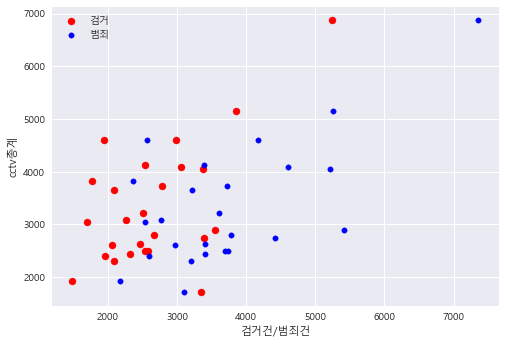

In [55]:
ax1=merge_crime_df.plot.scatter(x='검거건',y='cctv총계',color='red', s=50, label='검거')
merge_crime_df.plot.scatter(x='범죄건',y='cctv총계',color='blue', s=30, label='범죄', ax=ax1)
plt.xlabel('검거건/범죄건')

Text(0.5, 0, '검거건/범죄건')

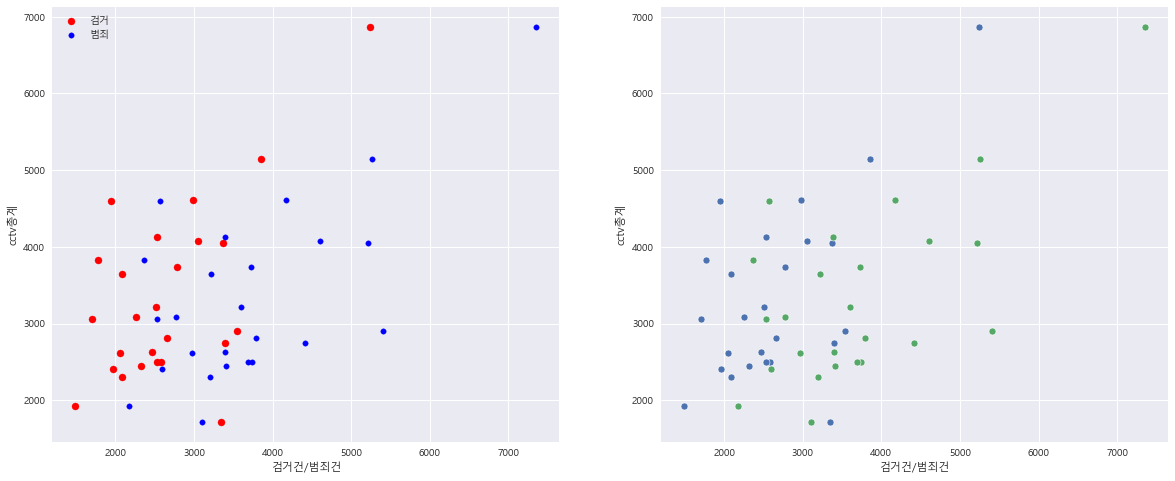

In [56]:
fig, axes = plt.subplots(1,2, figsize=(20,8))

merge_crime_df.plot.scatter(x='검거건',y='cctv총계',color='red', s=50, label='검거', ax=axes[0])
merge_crime_df.plot.scatter(x='범죄건',y='cctv총계',color='blue', s=30, label='범죄', ax=axes[0])
axes[0].set_xlabel('검거건/범죄건')

sns.scatterplot(data=merge_crime_df, x='검거건', y='cctv총계', ax=axes[1])
sns.scatterplot(data=merge_crime_df, x='범죄건', y='cctv총계', ax=axes[1])
axes[1].set_xlabel('검거건/범죄건')    

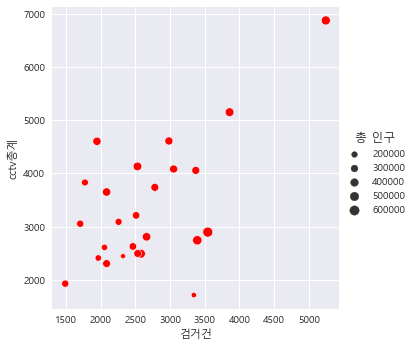

In [58]:
sns.relplot(data=merge_crime_df, x='검거건', y='cctv총계', size='총 인구', color='red')

<AxesSubplot:xlabel='검거건', ylabel='cctv총계'>

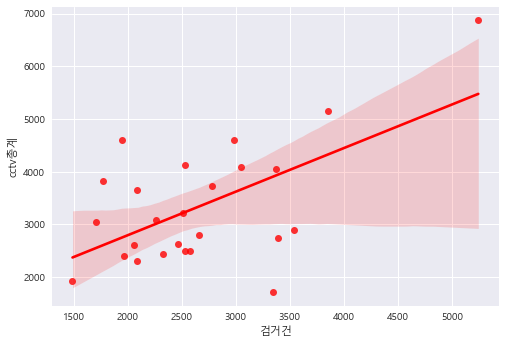

In [60]:
sns.regplot(data=merge_crime_df, x='검거건', y='cctv총계',color='red')

<AxesSubplot:xlabel='범죄건', ylabel='cctv총계'>

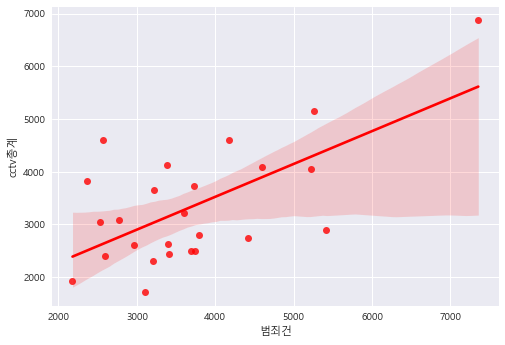

In [62]:
sns.regplot(data=merge_crime_df, x='범죄건', y='cctv총계', color='red')